Лаборатроная работа №**2**


**Сравнение методов классификации**


Выполнил студент группы 22.М07-мм


Захарова Оксана Михайловна 

**Задачи**

- [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

- [+] Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти тут.


- [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.


- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).


- [+] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.


- [+] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).


+ [+] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.


- [ ] * (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.


- [ ] * (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


**Подключение библиотек**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Подключение библиотек для встроенных алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

**Чтение данных**

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Описание датасета:

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации И научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

Количество пропущенных значений

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Проущенных значений нет

**Разведочный анализ (EDA)**

Значения, которые принимает целевой признак **target**

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

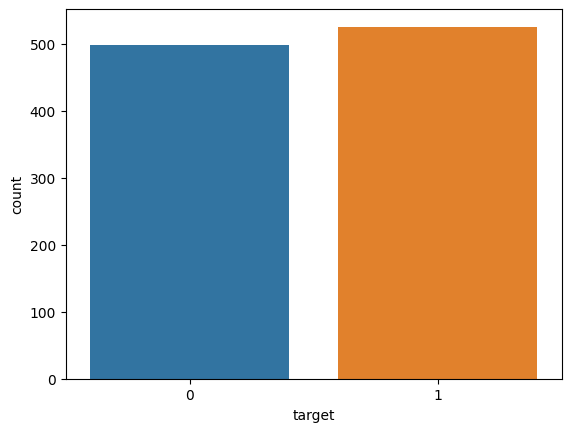

In [5]:
sns.countplot(x="target", data=df)
plt.show()

**Первичный анализ данных**

Количественный признак Age

In [6]:
df['age'].describe()


count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Зависимость заболеваний сердца от возраста

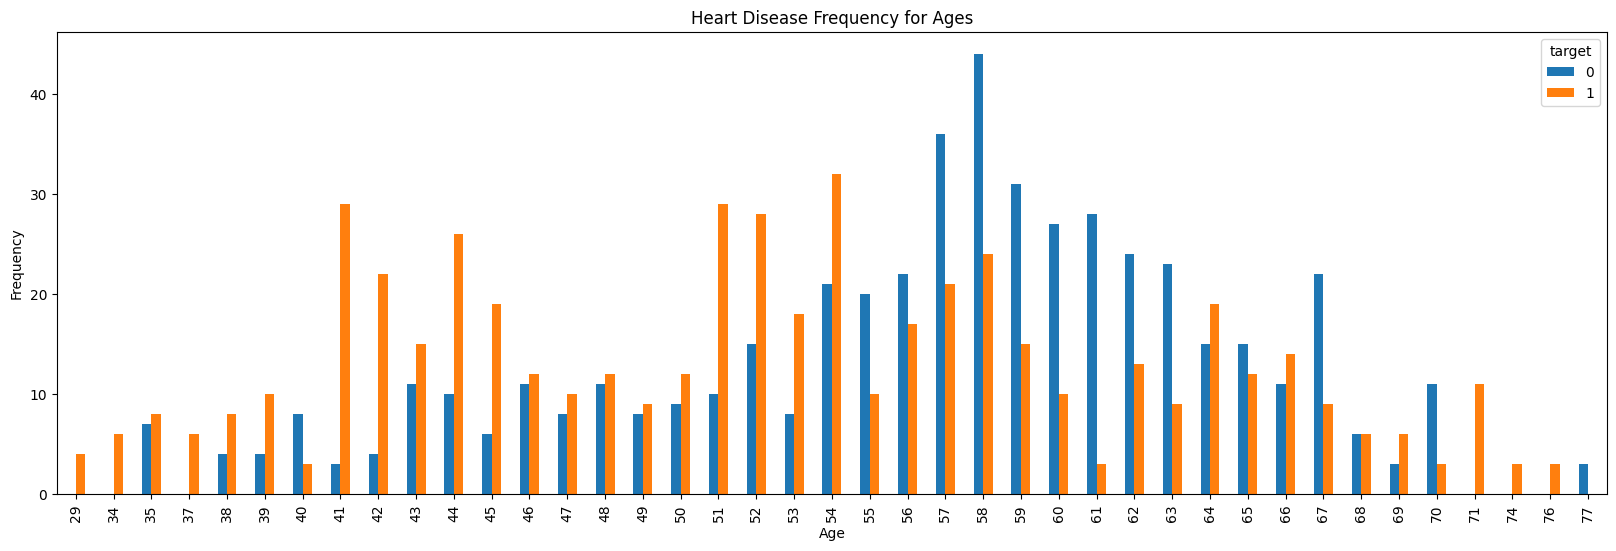

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Можно сделать следующие выводы:

1. До 55 лет выявляеся большое количество заболеваний сердца.

2. В 40 лет количество людей без заболевания сердца в 2 раза больше людей, с данной болезнью

3. До 40 лет и в промежутке с (40;55] людей с заболеванием сердца больше

Категориальный признак Sex

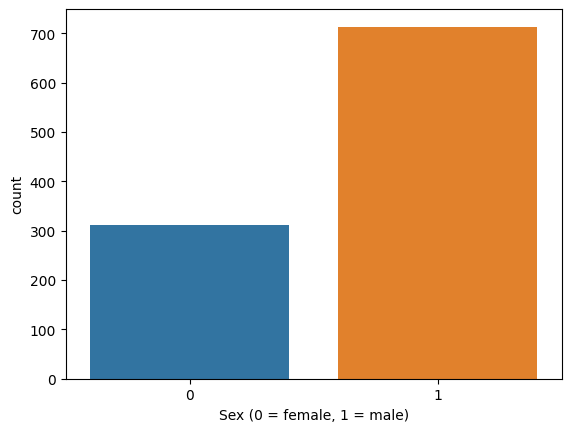

In [8]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()


Больше всего обследований проодят мужчины

Зависимость заболеваний сердца от пола

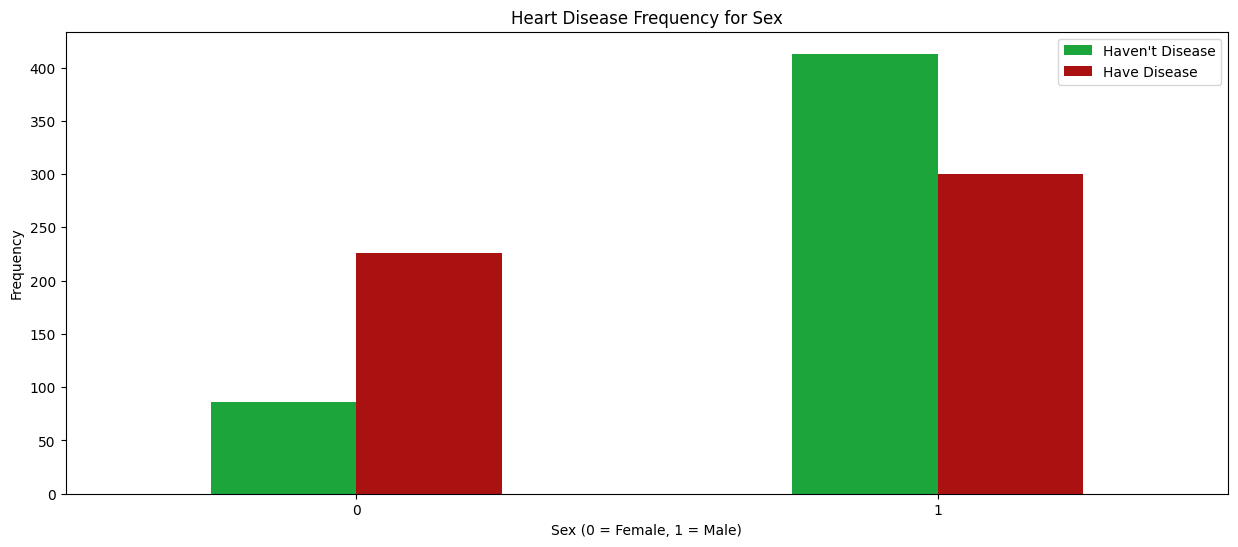

In [9]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

У женщин больше выявляют заболевание сердца, но количество мужщин, проходящих обслевадование больше

Категориальный признак cp - тип боли

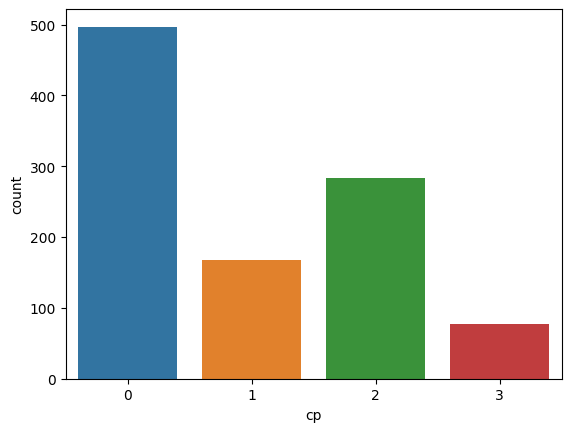

In [10]:
sns.countplot(x="cp", data=df)
plt.show()

Среди обратившихся большинство не испытывало боли

Зависимость типа боли от выявления заболевания

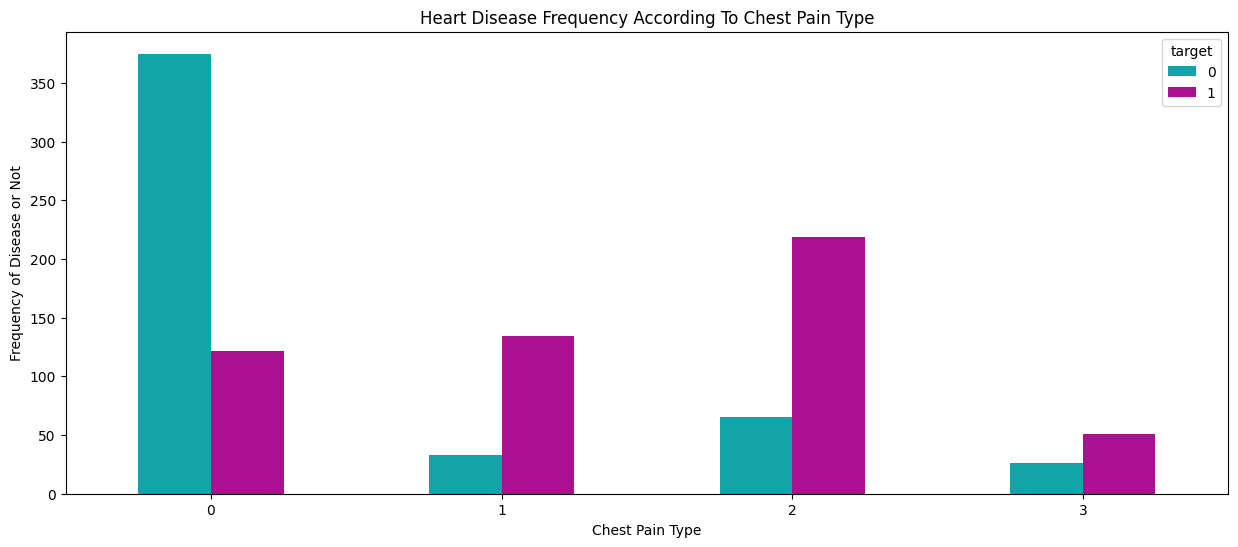

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

У людей, не испытавших боль, находили заболевание сердца. У людей, испытывающих боль разной степени, больше, чем в половине случаев находили заболевание сердца.

Количественный признак fbs

Зависимость заболевания сердца от уровня сахара в крови

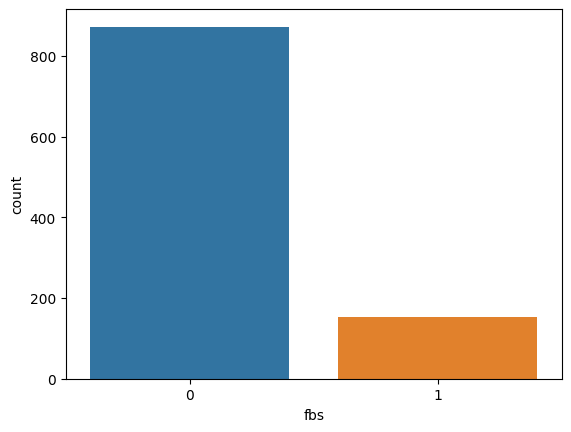

In [12]:
sns.countplot(x="fbs", data=df)
plt.show()

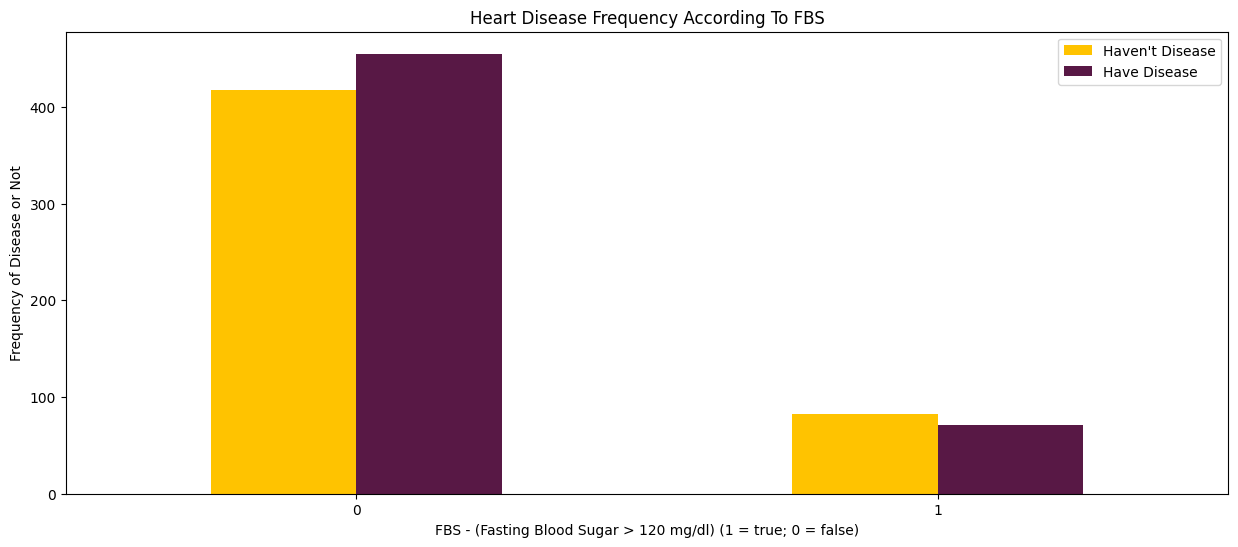

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Сильной зависимости не наблюдается

Категориальный признак ca

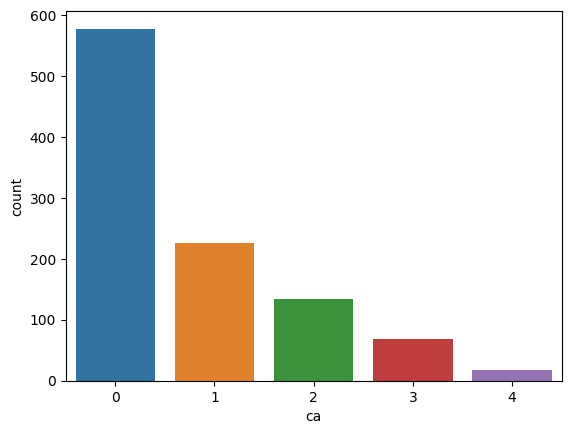

In [14]:
sns.countplot(x="ca", data=df)
plt.show()

Зависимость заболевания сердца от количества крупных сосудов, окрашенных при флюороскопии

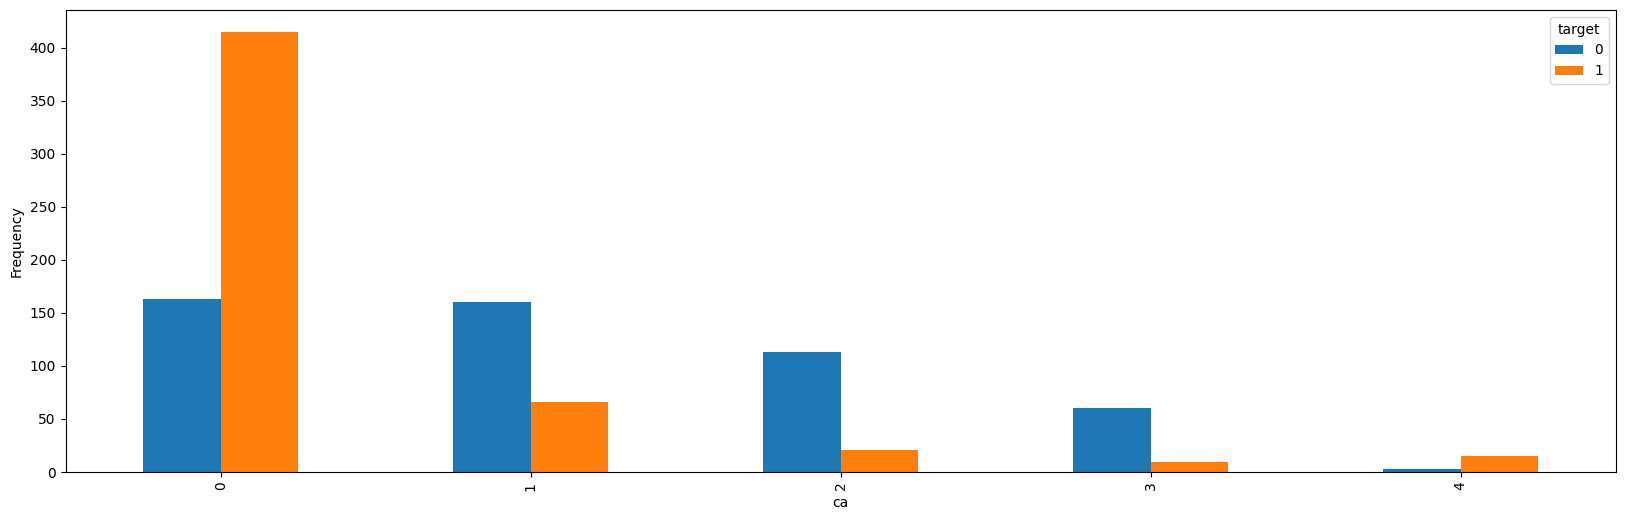

In [15]:
pd.crosstab(df.ca,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('ca')
plt.ylabel('Frequency')
plt.show()

Самое опасное - иметь 1 окрашенный сосуд, при 4 окрашенных сосудов тоже есть опастность, но не такая большая

Корреляция данных

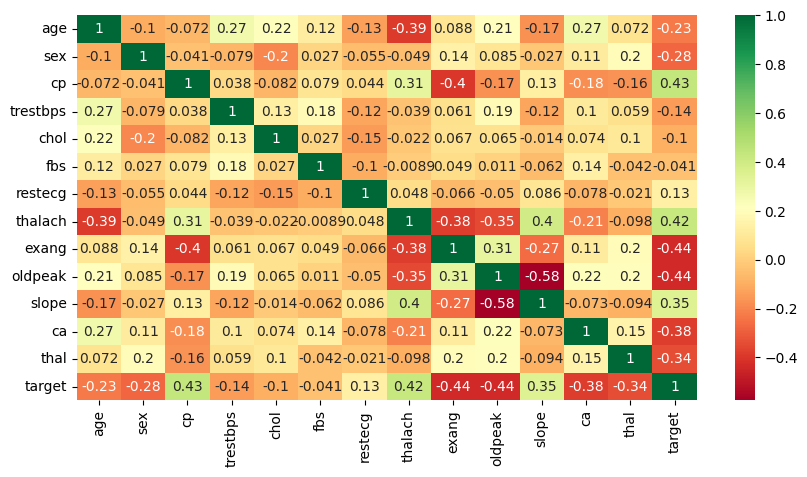

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Сильной корреляции не наблюдается

**Самостоятельная реализация svm**


In [86]:
#Поключение библиотек

from random import seed
from random import randrange

# Разделение датасета на k фолдов

def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = dataset.values.tolist()
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Подсчет точности

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) 

# Оценка алгоритма, используя кросс-валидацию 

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Разеление набора данных

def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right


# Вычисление критерия Джинни (gini)

def gini_index(groups, class_values):
	gini = 0.0
	for class_value in class_values:
		for group in groups:
			size = len(group)
			if size == 0:
				continue
			proportion = [row[-1] for row in group].count(class_value) / float(size)
			gini += (proportion * (1.0 - proportion))
	return gini

# Выбор наилучшей точки разделения для набора данных

def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Создание значения конечного узла

def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Создание дочернего узла (терминального)

def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# проверка на разрыв
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# проверка на максимальную глубину
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# Обработка левого дочернего элемента
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# Обработка правого дочернего элемента
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)


# Создание дерева решений

def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Прогноз с помощью дерева решений

def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

#
def predictions(test):
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return predictions
# Алгоритм дерева классификации и регрессии

def decision_tree(train, test, max_depth, min_size):
	global tree
	tree = build_tree(train, max_depth, min_size)
	return predictions(test)



Выбор наилучших параметров

In [18]:
optimal_max_depth = 0
optimal_min_size = 0
maxValue = 0
n_folds = 5
for max_depth in range(2, 10):
    for min_size in range(6, 15):
        scores = evaluate_algorithm(df, decision_tree, n_folds, max_depth, min_size)
        mean = sum(scores)/float(len(scores))
        if (mean > maxValue):
            optimal_max_depth = max_depth
            optimal_min_size = min_size
            maxValue = mean
print(optimal_max_depth)
print(optimal_min_size)

6
7


In [57]:
accuracies = {}
# Инициализация случайных чисел
seed(1)

# Применение алгоритма
n_folds = 5
max_depth = 6
min_size = 7
scores = evaluate_algorithm(df, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f' % (sum(scores)/float(len(scores))))

accuracies['Own decision Tree'] = sum(scores)/float(len(scores))

Scores: [0.5219512195121951, 0.5219512195121951, 0.45365853658536587, 0.5317073170731708, 0.5463414634146342]
Mean Accuracy: 0.515


**Подготовка данных**

In [80]:
y = df['target']
X = df.drop(columns=['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

**Обучение на собственной реализации**

**Встроенные классификации**

**Logistic Regression**

In [37]:

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8052


**K-Nearest Neighbour (KNN) Classification**

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

acc = knn.score(X_test_scaled, y_test)
accuracies['NN'] = acc

3 NN Score: 0.9351


**Support Vector Machine (SVM)**

In [39]:
svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.8896


**Naive Bayes Algorithm**

In [40]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.8149


**Decision Tree Algorithm**

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9708


**Сравнение моделей**

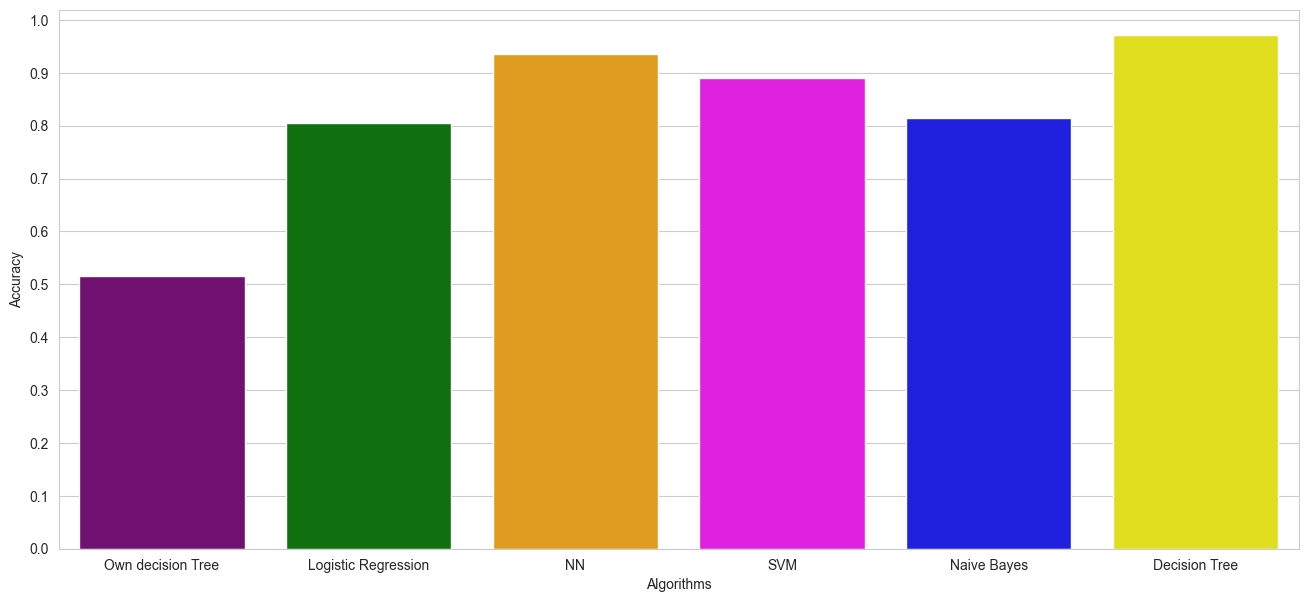

In [42]:
colors = ["purple", "green", "orange", "magenta", "blue", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

**Вывод**

Наилучшй результат дает библиотечная модель Decission Tree, также хорший результат у NN (K-ближайших соседей) и SVM (опорные векторы)

**Построение Confusion Matrices**

In [91]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)
y_head_Mydtc = predictions(X_test.values.tolist())
y_head_Mydtc = [int(i)-2 if int(i)>1 else int(i) for i in y_head_Mydtc ]


[[119  40]
 [ 20 129]]
[[146  13]
 [147   2]]


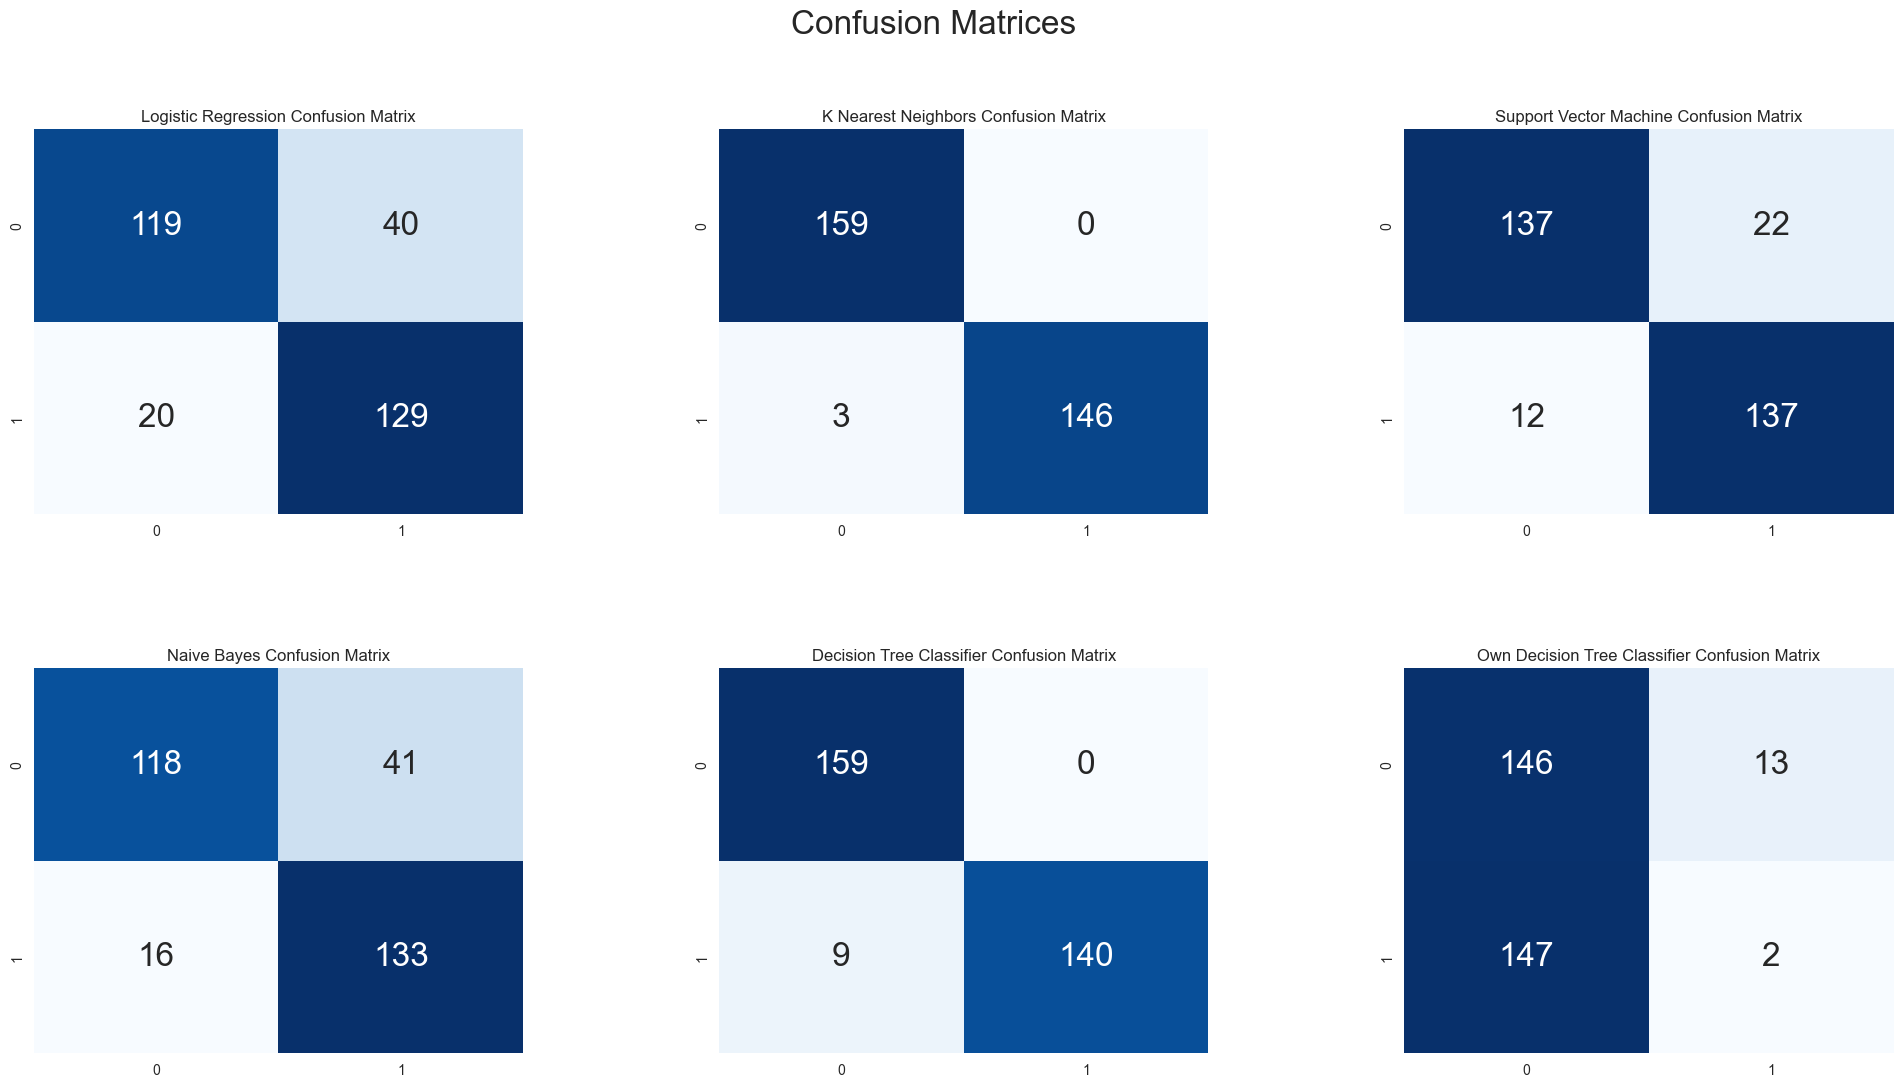

In [90]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
print(cm_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_Mydtc = confusion_matrix(y_test, y_head_Mydtc)
print(cm_Mydtc)
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Own Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_Mydtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


**Выводы**

Меньше всего ошибок 1 и 2 рода у библиотечных функций k-ближайших соседей и дерева решений. Следовательно, они дают наилучший результат.